<a href="https://colab.research.google.com/github/WonminSong/AI/blob/master/bike_sharing_demand%EB%85%B8%ED%8A%B8%EB%B6%81%20%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

중3 때 https://www.kaggle.com/kwonyoung234/for-beginner 노트북을 보고 각 코드가 어떤 역할을 하는지 분석함

In [7]:
"""
전체 느낀점: 코드를 하나씩 따라써보며 코드가 어떻게 작동하는지 더욱 잘 알게 되었고 개념만 있던 python과 pandas를 다루는 기술 향상(?)
그러나 후반에 가서 머신러닝 기법을 보니 이론적으로 조금 아는것과는 다른 것 같다.
##은 내 느낀점
##???은 이론은 대충 검색해서 알 거 같으나 어떻게 작동하는지 이해가 안된다
참고 사이트(나중에 또 한번 공부용)
https://datascienceschool.net/view-notebook/465066ac92ef4da3b0aba32f76d9750a/
https://m.blog.naver.com/PostView.nhn?blogId=okkam76&logNo=221372134987&proxyReferer=https%3A%2F%2Fwww.google.com%2F
https://3months.tistory.com/292
https://m.blog.naver.com/jung2381187/220408716017
https://c10106.tistory.com/3977
https://rfriend.tistory.com/470
https://rfriend.tistory.com/257
"""

'\n전체 느낀점: 코드를 하나씩 따라써보며 코드가 어떻게 작동하는지 더욱 잘 알게 되었고 개념만 있던 python과 pandas를 다루는 기술 향상(?)\n그러나 후반에 가서 머신러닝 기법을 보니 이론적으로 조금 아는것과는 다른 것 같다.\n##은 내 느낀점\n##???은 이론은 대충 검색해서 알 거 같으나 어떻게 작동하는지 이해가 안된다\n참고 사이트(나중에 또 한번 공부용)\nhttps://datascienceschool.net/view-notebook/465066ac92ef4da3b0aba32f76d9750a/\nhttps://m.blog.naver.com/PostView.nhn?blogId=okkam76&logNo=221372134987&proxyReferer=https%3A%2F%2Fwww.google.com%2F\nhttps://3months.tistory.com/292\nhttps://m.blog.naver.com/jung2381187/220408716017\nhttps://c10106.tistory.com/3977\nhttps://rfriend.tistory.com/470\nhttps://rfriend.tistory.com/257\n'

In [8]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/AI/bike-sharing-demand")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import warnings ##경고표시 무시
warnings.filterwarnings('ignore')

import numpy as np ##numpy 라이브러리 사용
import pandas as pd ##pandas 라이브러리 사용 
import seaborn as sns #시각화를 위한 라이브러리 ##https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/
import matplotlib.pyplot as plt ##데이터 시각화 패키지 ##http://pythonstudy.xyz/python/article/407-Matplotlib-%EC%B0%A8%ED%8A%B8-%ED%94%8C%EB%A1%AF-%EA%B7%B8%EB%A6%AC%EA%B8%B0
import calendar ##달력 사용가능 
from datetime import datetime ##연월일시분초를 나눌 수 있다


In [10]:
train = pd.read_csv('/content/drive/My Drive/AI/bike-sharing-demand/train.csv') ##파일 지정
test = pd.read_csv('/content/drive/My Drive/AI/bike-sharing-demand/test.csv') ##파일 지정

In [11]:
train.head(10) ##데이터의 위에서부터 10개까지 보기

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [12]:
train.info() ##데이터의 자료형? 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [13]:
train.head() ##train 데이터 값 보기

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
test.head() ##test 데이터 값 보기

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [15]:
train['tempDate'] = train.datetime.apply(lambda x:x.split()) ##datetime을 년 월 일 시간 구분하여 tempDate에 0번부터 넣는 것 같다

In [16]:
#분리한 tempDate를 가지고 년-월-일을 이용하여 year,month,day 그리고 weekday column을 추출한다.
# split() 내장함수 설명: https://wikidocs.net/13
# [문자형 자료형_ 문자열 나누기] <=> join() [문자형 자료형_ 문자열 삽입]
train['year'] = train.tempDate.apply(lambda x:x[0].split('-')[0])
train['month'] = train.tempDate.apply(lambda x:x[0].split('-')[1])
train['day'] = train.tempDate.apply(lambda x:x[0].split('-')[2])
#weekday는 calendar패키지와 datetime패키지를 활용한다.
#calendar.day_name 사용법 : https://stackoverflow.com/questions/36341484/get-day-name-from-weekday-int
#datetime.strptime 문서: https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
#파이썬에서 날짜와 시간 다루기: https://datascienceschool.net/view-notebook/465066ac92ef4da3b0aba32f76d9750a/ 
train['weekday'] = train.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])

train['hour'] = train.tempDate.apply(lambda x:x[1].split(':')[0])
train['hosur'] = train.tempDate.apply(lambda x:x[1].split(':')[0])
train['hourd'] = train.tempDate.apply(lambda x:x[1].split(':')[0]) ##새로운 column 생성을 알기 위해 넣어본 코드

In [17]:
train.tail() ##새로운 column이 제대로 생겨났는지 체크

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,year,month,day,weekday,hour,hosur,hourd
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,"[2012-12-19, 19:00:00]",2012,12,19,Wednesday,19,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,"[2012-12-19, 20:00:00]",2012,12,19,Wednesday,20,20,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,"[2012-12-19, 21:00:00]",2012,12,19,Wednesday,21,21,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,"[2012-12-19, 22:00:00]",2012,12,19,Wednesday,22,22,22
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,"[2012-12-19, 23:00:00]",2012,12,19,Wednesday,23,23,23


In [18]:
train = train.drop('hosur',axis=1)
train = train.drop('hourd',axis=1) ##drop 기능을 알기 위해 넣어본 코드

In [19]:
train.head() ##drop이 잘 작동했는지 체크

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"[2011-01-01, 00:00:00]",2011,01,01,Saturday,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"[2011-01-01, 01:00:00]",2011,01,01,Saturday,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"[2011-01-01, 02:00:00]",2011,01,01,Saturday,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,"[2011-01-01, 03:00:00]",2011,01,01,Saturday,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,"[2011-01-01, 04:00:00]",2011,01,01,Saturday,04


In [20]:
train.info() ##새로운 column들의 데이터 타입 알아보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  object 
 14  month       10886 non-null  object 
 15  day         10886 non-null  object 
 16  weekday     10886 non-null  object 
 17  hour        10886 non-null  object 
dtypes: float64(3), int64(8), object(7)
memory usage: 1.5+ MB


In [21]:
#분리를 통해 추출된 속성은 문자열 속성을 가지고 있음 따라서 숫자형 데이터로 변환해 줄 필요가 있음.
#pandas.to_numeric(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html
train['year'] = pd.to_numeric(train.year,errors='coerce')
train['month'] = pd.to_numeric(train.month,errors='coerce')
train['day'] = pd.to_numeric(train.day,errors='coerce')
train['hour'] = pd.to_numeric(train.hour,errors='coerce')
##숫자로 이루어진 년 월 일 시간의 변수형을 바꿔준다
##pd.to_numeric(x errors='coerce')<--이부분이 숫자로 바꿔준다고 한다.

In [22]:
#필요를 다한 tempDate column을 drop함
train = train.drop('tempDate',axis=1)

In [23]:
train.info() ##변경사항 체크하기
train.head() ##변경사항 체크하기22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  weekday     10886 non-null  object 
 16  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(2)
memory usage: 1.4+ MB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,4


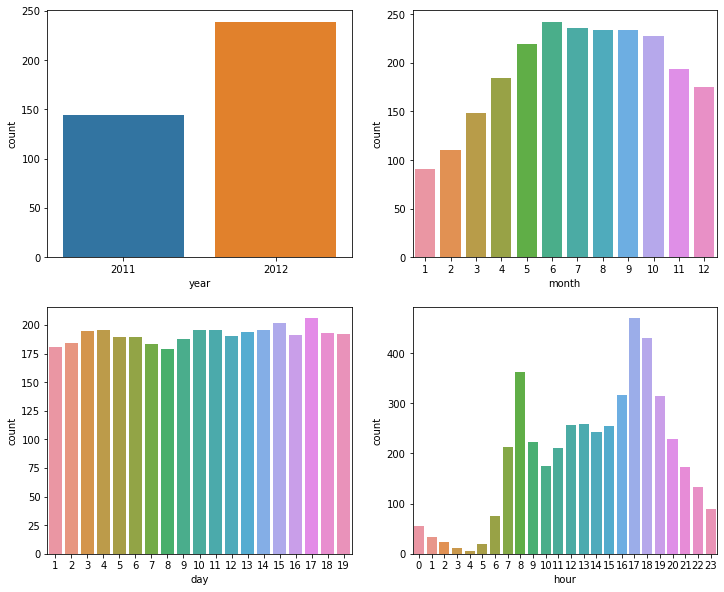

In [24]:
#각각의 속성과 예측의 결과값으로 쓰이는 count값과의 관계 파악

#년도와 count
fig = plt.figure(figsize=[12,10]) ##그래프를 만들 빈 공간 생성
ax1 = fig.add_subplot(2,2,1) ##민피셜 그래프들중에 위치를 표현
ax1 = sns.barplot(x='year',y='count',data=train.groupby('year')['count'].mean().reset_index())##민피셜22 x축과 y축 설정

#month와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

#day와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y='count',data=train.groupby('day')['count'].mean().reset_index())

#hour와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour',y='count',data=train.groupby('hour')['count'].mean().reset_index())

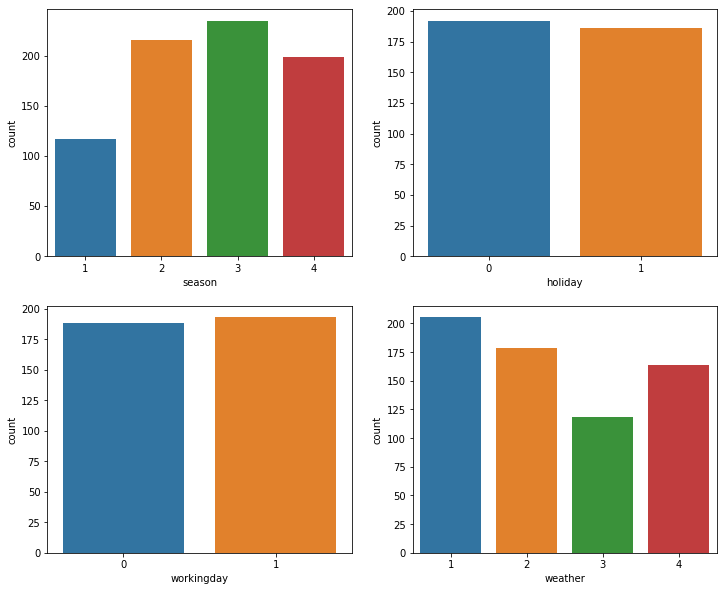

In [25]:
#계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

#휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())

#작업일 여부와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())

#날씨와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())

In [26]:
"""
해당 부분은 필자가 스스로 데이터를 보고 이상함을 느껴 전처리함.
왜냐하면, 처음 import한 데이터 셋에서 head()를 하였을 때 1월1일의 season column은 1 즉 봄을 가르키는데,
직접 3월에 washington을 직접 가본 결과 1월은 확실히 겨울이다.
따라서 아래의 badToRight를 이용하여 season column을 수정하고자 했음.
이 데이터 때문에 참조했던 커널과는 다른 정확도를 나타낼 수 있음.
"""

##그런거 없다 난 여름이랑 겨울만 있다

def badToRight(month):
    if month in [12,1,2]:
        return 2
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 1
    elif month in [9,10,11]:
        return 2

#apply() 내장함수는 split(),map(),join(),filter()등 과 함꼐 필수적으로 숙지해야 할 함수이다.
train['season'] = train.month.apply(badToRight)

In [27]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,2,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,0
1,2011-01-01 01:00:00,2,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 02:00:00,2,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,2
3,2011-01-01 03:00:00,2,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,3
4,2011-01-01 04:00:00,2,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,4


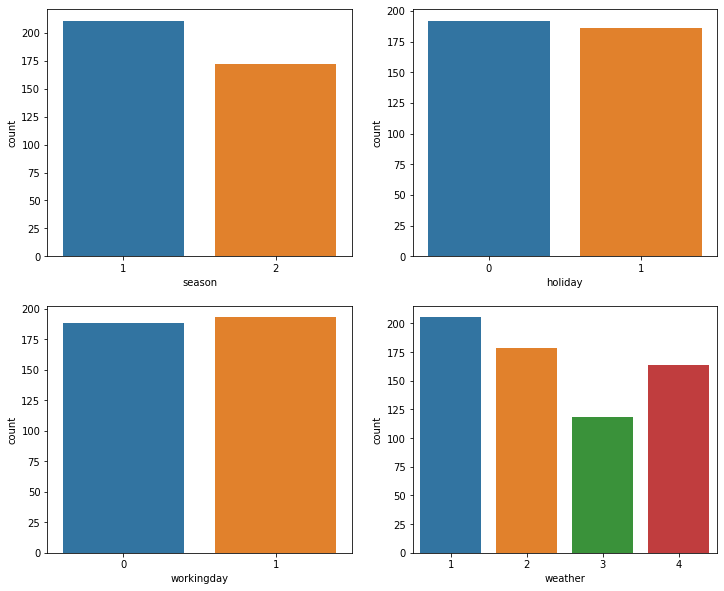

In [28]:
#위의 시각화와 같이 하나의 컬럼과 결과 값을 비교해보자

#계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

#휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())

#작업일 여부와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())

#날씨와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())

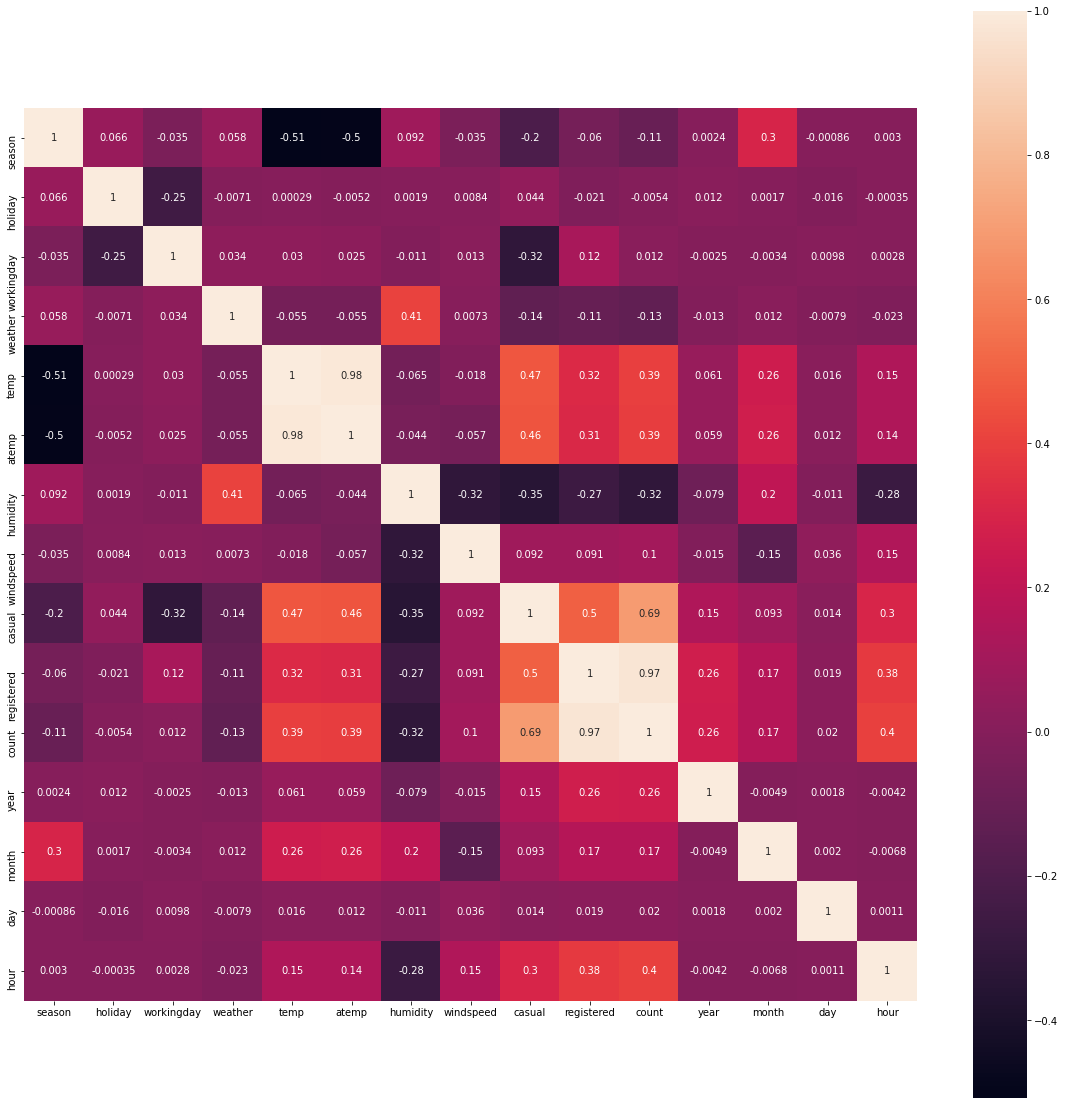

In [29]:
#각각의 컬럼들 간의 상관계수를 heatmap을 통해 시각화
##히트맵
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True,square=True)

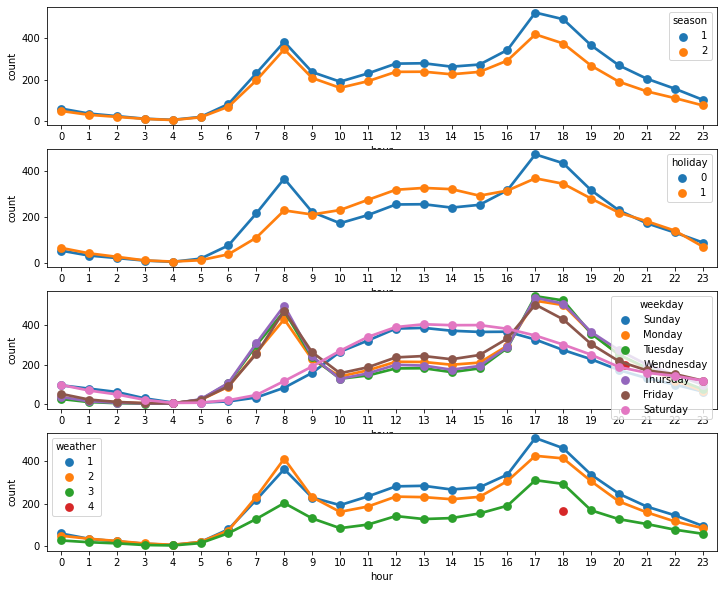

In [30]:
#heatmap 상관관계를 참조하여 이전의 시각화와는 달리 두 개의 서로다른 컬럼이 적용된 count를 시각화해보자
##pointplot
#시간과 계절에 따른 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(4,1,1) ##민피셜 4는 그래프 표시할때 세로 1은 그래프 표시할때 가로 마지막은 그래프가 나오는 순서
ax1 = sns.pointplot(x='hour',y='count',hue='season',data=train.groupby(['season','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax2 = fig.add_subplot(4,1,2)
ax2 = sns.pointplot(x='hour',y='count',hue='holiday',data=train.groupby(['holiday','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax3 = fig.add_subplot(4,1,3)
ax3 = sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday'],data=train.groupby(['weekday','hour'])['count'].mean().reset_index())

#시간과 날씨에 따른 count
ax4 = fig.add_subplot(4,1,4)
ax4 = sns.pointplot(x='hour',y='count',hue='weather',data=train.groupby(['weather','hour'])['count'].mean().reset_index())

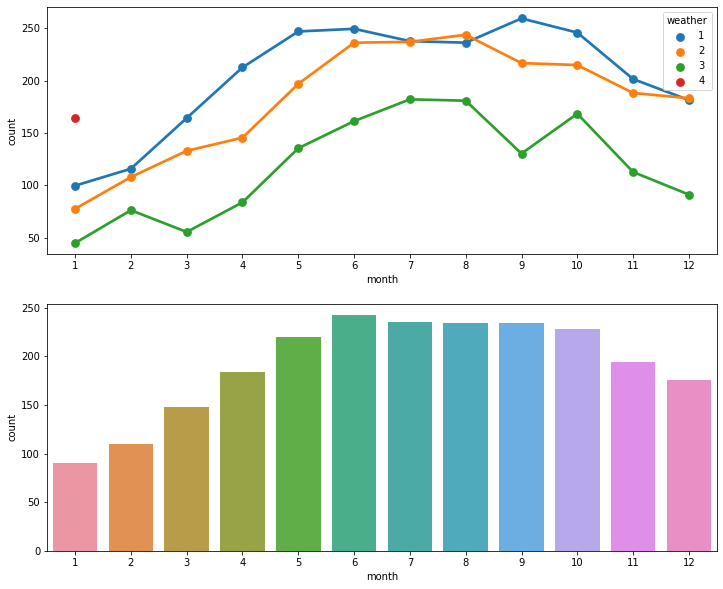

In [31]:
#달과 날씨에 따른 count 
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.pointplot(x='month',y='count',hue='weather',data=train.groupby(['weather','month'])['count'].mean().reset_index())

#달별 count
ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())


In [32]:
#머신러닝 모델에 훈련시킬 때는 문자열 값은 불가능하기 때문에 문자열을 카테고리화 하고 각각에 해당하는 값을 숫자로 변환해준다
train['weekday']= train.weekday.astype('category')

In [33]:
print(train['weekday'].cat.categories)

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')


In [34]:
train.weekday.cat.categories = ['5','1','6','0','4','2','3']

In [35]:
"""

RandomForest를 활용하여 Windspeed값을 부여해보자
하나의 데이터를 Windspeed가 0인 그리고 0이 아닌 데이터프레임으로 분리하고
학습시킬 0이 아닌 데이터 프레임에서는 Windspeed만 담긴 Series와 이외의 학습시킬 column들의 데이터프레임으로 분리한다
학습 시킨 후에 Windspeed가 0인 데이터 프레임에서 학습시킨 컬럼과 같게 추출하여 결과 값을 부여받은 후,
Windspeed가 0인 데이터프레임에 Windspeed값을 부여한다.

##계절로 한번 해보았다
from sklearn.ensemble import RandomForestRegressor

##겨울
season_2 = train[train.season == 2]
##여름
season_1 = train[train.season == 1]

##season2가 2인 데이터 프레임에 투입을 원치 않는 컬럼을 배제
season_2_df = season_2.drop(['season','casual','registered','count','datetime'],axis=1)

##season2가 1인 데이터 프레임은 위와 동일한 데이터프레임을 형성하고 학습시킬 Windspeed Series를 그대로 둠
season_1_df = season_1.drop(['season','casual','registered','count','datetime'],axis=1)
season_1_series = season_1['season'] 

##모델에 2가 아닌 데이터프레임과 결과값을 학습
rf = RandomForestRegressor()
rf.fit(season_1_df,season_1_series)
#학습된 모델에 season2가 2인 데이터프레임의 season를 도출
predicted_season_2 = rf.predict(season_2_df)
#도출된 값을 원래의 데이터프레임에 삽입
season_2['season'] = predicted_season_2
"""

##하고보니까 0인값을 채우는 거였음

"\n\nRandomForest를 활용하여 Windspeed값을 부여해보자\n하나의 데이터를 Windspeed가 0인 그리고 0이 아닌 데이터프레임으로 분리하고\n학습시킬 0이 아닌 데이터 프레임에서는 Windspeed만 담긴 Series와 이외의 학습시킬 column들의 데이터프레임으로 분리한다\n학습 시킨 후에 Windspeed가 0인 데이터 프레임에서 학습시킨 컬럼과 같게 추출하여 결과 값을 부여받은 후,\nWindspeed가 0인 데이터프레임에 Windspeed값을 부여한다.\n\n##계절로 한번 해보았다\nfrom sklearn.ensemble import RandomForestRegressor\n\n##겨울\nseason_2 = train[train.season == 2]\n##여름\nseason_1 = train[train.season == 1]\n\n##season2가 2인 데이터 프레임에 투입을 원치 않는 컬럼을 배제\nseason_2_df = season_2.drop(['season','casual','registered','count','datetime'],axis=1)\n\n##season2가 1인 데이터 프레임은 위와 동일한 데이터프레임을 형성하고 학습시킬 Windspeed Series를 그대로 둠\nseason_1_df = season_1.drop(['season','casual','registered','count','datetime'],axis=1)\nseason_1_series = season_1['season'] \n\n##모델에 2가 아닌 데이터프레임과 결과값을 학습\nrf = RandomForestRegressor()\nrf.fit(season_1_df,season_1_series)\n#학습된 모델에 season2가 2인 데이터프레임의 season를 도출\npredicted_season_2 = rf.predict(season_2_df)\n#도출된 값을 원래의 데이터프레임에 삽입\nseason_2['season'] = pred

In [36]:
"""
#나눈 데이터 프레임을 원래의 형태로 복원
train = pd.concat([season_2,season_1],axis=0)
"""

'\n#나눈 데이터 프레임을 원래의 형태로 복원\ntrain = pd.concat([season_2,season_1],axis=0)\n'

In [37]:
"""
RandomForest를 활용하여 Windspeed값을 부여해보자
하나의 데이터를 Windspeed가 0인 그리고 0이 아닌 데이터프레임으로 분리하고
학습시킬 0이 아닌 데이터 프레임에서는 Windspeed만 담긴 Series와 이외의 학습시킬 column들의 데이터프레임으로 분리한다
학습 시킨 후에 Windspeed가 0인 데이터 프레임에서 학습시킨 컬럼과 같게 추출하여 결과 값을 부여받은 후,
Windspeed가 0인 데이터프레임에 Windspeed값을 부여한다.
"""
from sklearn.ensemble import RandomForestRegressor

#Windspeed가 0인 데이터프레임
windspeed_0 = train[train.windspeed == 0]
#Windspeed가 0이 아닌 데이터프레임
windspeed_Not0 = train[train.windspeed != 0]

#Windspeed가 0인 데이터 프레임에 투입을 원치 않는 컬럼을 배제
windspeed_0_df = windspeed_0.drop(['windspeed','casual','registered','count','datetime'],axis=1)

#Windspeed가 0이 아닌 데이터 프레임은 위와 동일한 데이터프레임을 형성하고 학습시킬 Windspeed Series를 그대로 둠
windspeed_Not0_df = windspeed_Not0.drop(['windspeed','casual','registered','count','datetime'],axis=1)
windspeed_Not0_series = windspeed_Not0['windspeed'] 

#모델에 0이 아닌 데이터프레임과 결과값을 학습
rf = RandomForestRegressor()
rf.fit(windspeed_Not0_df,windspeed_Not0_series)
#학습된 모델에 Windspeed가 0인 데이터프레임의 Windspeed를 도출
predicted_windspeed_0 = rf.predict(windspeed_0_df)
#도출된 값을 원래의 데이터프레임에 삽입
windspeed_0['windspeed'] = predicted_windspeed_0

In [38]:
#나눈 데이터 프레임을 원래의 형태로 복원
train = pd.concat([windspeed_0,windspeed_Not0],axis=0)

In [39]:
print(train.datetime)

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object


In [40]:
#시간별 정렬을 위해 string type의 datetime을 datetime으로 변환
train.datetime = pd.to_datetime(train.datetime,errors='coerce')

In [41]:
print(train.datetime)

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]


In [42]:
#합쳐진 데이터를 datetime순으로 정렬
train = train.sort_values(by=['datetime'])

In [43]:
print(train.datetime)

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]


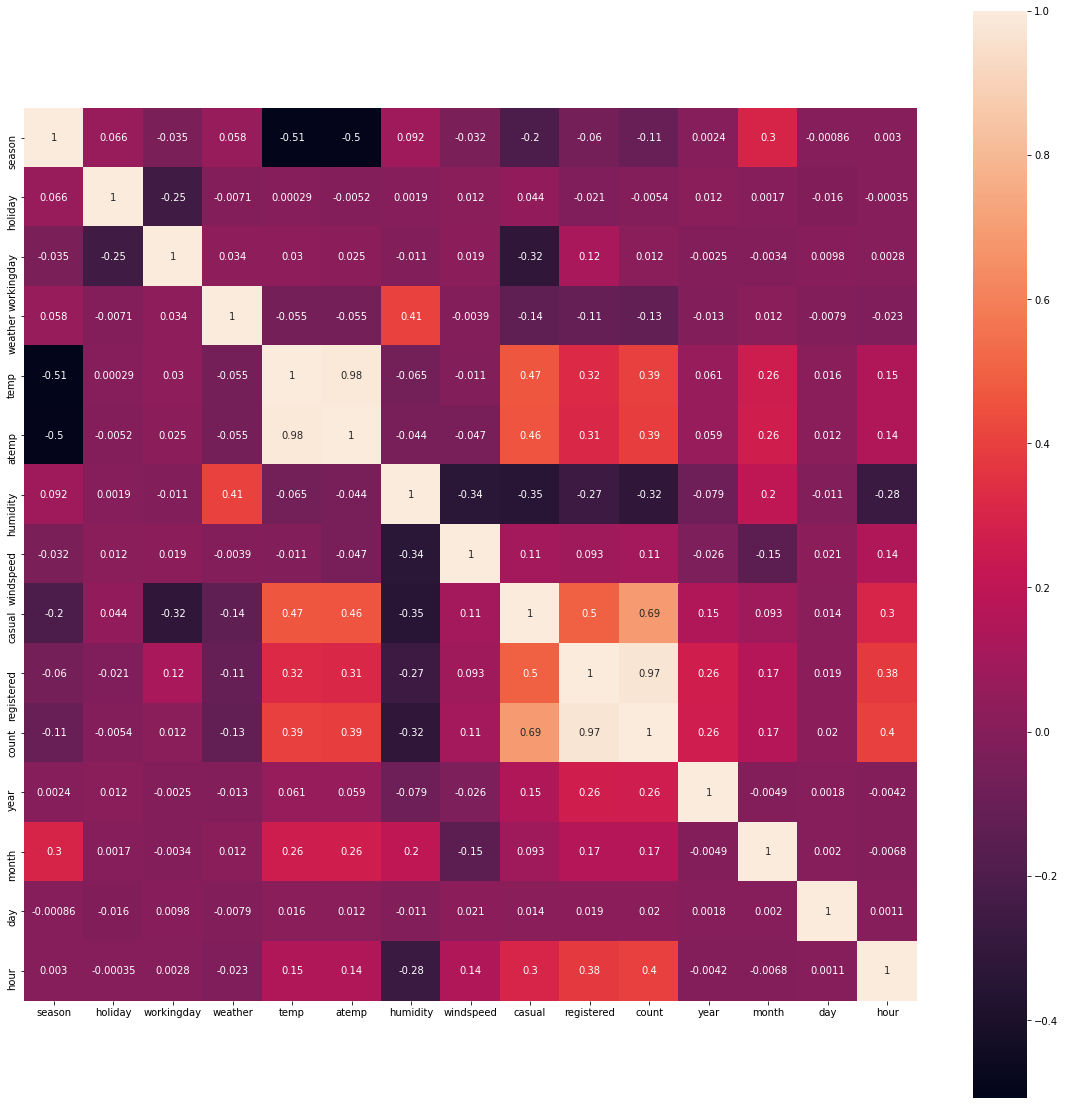

In [44]:
#windspeed를 수정한 후 다시 상관계수를 분석
#우리의 기대와는 달리 windspeed와 count의 상관관계는 0.1에서 0.11로 간소한 차이만 보임.
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True,square=True)

In [46]:
"""이제 모든 동일한 전처리 과정을 test셋과 한꺼번에 진행"""
train = pd.read_csv('/content/drive/My Drive/AI/bike-sharing-demand/train.csv')
test = pd.read_csv('/content/drive/My Drive/AI/bike-sharing-demand/test.csv')

In [47]:
combine = pd.concat([train,test],axis=0)

In [48]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.7+ MB


In [49]:
combine['tempDate'] = combine.datetime.apply(lambda x:x.split())
combine['weekday'] = combine.tempDate.apply(lambda x: calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
combine['year'] = combine.tempDate.apply(lambda x: x[0].split('-')[0])
combine['month'] = combine.tempDate.apply(lambda x: x[0].split('-')[1])
combine['day'] = combine.tempDate.apply(lambda x: x[0].split('-')[2])
combine['hour'] = combine.tempDate.apply(lambda x: x[1].split(':')[0])

In [50]:
combine['year'] = pd.to_numeric(combine.year,errors='coerce')
combine['month'] = pd.to_numeric(combine.month,errors='coerce')
combine['day'] = pd.to_numeric(combine.day,errors='coerce')
combine['hour'] = pd.to_numeric(combine.hour,errors='coerce')

In [51]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  tempDate    17379 non-null  object 
 13  weekday     17379 non-null  object 
 14  year        17379 non-null  int64  
 15  month       17379 non-null  int64  
 16  day         17379 non-null  int64  
 17  hour        17379 non-null  int64  
dtypes: float64(6), int64(9), object(3)
memory usage: 2.5+ MB


In [52]:
combine['season'] = combine.month.apply(badToRight)

In [53]:
combine.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-01 00:00:00,2,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,"[2011-01-01, 00:00:00]",Saturday,2011,1,1,0
1,2011-01-01 01:00:00,2,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,"[2011-01-01, 01:00:00]",Saturday,2011,1,1,1
2,2011-01-01 02:00:00,2,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,"[2011-01-01, 02:00:00]",Saturday,2011,1,1,2
3,2011-01-01 03:00:00,2,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,"[2011-01-01, 03:00:00]",Saturday,2011,1,1,3
4,2011-01-01 04:00:00,2,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,"[2011-01-01, 04:00:00]",Saturday,2011,1,1,4


In [54]:
combine.weekday = combine.weekday.astype('category')

In [55]:
combine.weekday.cat.categories = ['5','1','6','0','4','2','3']

In [56]:
dataWind0 = combine[combine['windspeed']==0]
dataWindNot0 = combine[combine['windspeed']!=0]

In [57]:
dataWind0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'tempDate', 'weekday', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [58]:
dataWind0_df = dataWind0.drop(['windspeed','casual','registered','count','datetime','tempDate'],axis=1)

dataWindNot0_df = dataWindNot0.drop(['windspeed','casual','registered','count','datetime','tempDate'],axis=1)
dataWindNot0_series = dataWindNot0['windspeed']

In [59]:
dataWindNot0_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,weekday,year,month,day,hour
5,2,0,0,2,9.84,12.880,75,6,2011,1,1,5
10,2,0,0,1,15.58,19.695,76,6,2011,1,1,10
11,2,0,0,1,14.76,16.665,81,6,2011,1,1,11
12,2,0,0,1,17.22,21.210,77,6,2011,1,1,12
13,2,0,0,2,18.86,22.725,72,6,2011,1,1,13


In [60]:
dataWind0_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,weekday,year,month,day,hour
0,2,0,0,1,9.84,14.395,81,6,2011,1,1,0
1,2,0,0,1,9.02,13.635,80,6,2011,1,1,1
2,2,0,0,1,9.02,13.635,80,6,2011,1,1,2
3,2,0,0,1,9.84,14.395,75,6,2011,1,1,3
4,2,0,0,1,9.84,14.395,75,6,2011,1,1,4


In [61]:
rf2 = RandomForestRegressor()
rf2.fit(dataWindNot0_df,dataWindNot0_series)
predicted = rf2.predict(dataWind0_df)
print(predicted)

[ 7.292414  6.722579  6.642648 ...  8.172124 25.140276 11.490634]


In [62]:
dataWind0['windspeed'] = predicted

In [63]:
combine = pd.concat([dataWind0,dataWindNot0],axis=0)

In [64]:
#우리가 가진 column들 중 값들이 일정하고 정해져있다면 category로 변경해주고
#필요하지 않은 column들은 이제 버린다.
categorizational_columns = ['holiday','humidity','season','weather','workingday','year','month','day','hour']
drop_columns = ['datetime','casual','registered','count','tempDate']

In [65]:
#categorical하게 변환
for col in categorizational_columns:
    combine[col] = combine[col].astype('category')

In [66]:
#합쳐진 combine데이터 셋에서 count의 유무로 훈련과 테스트셋을 분리하고 각각을 datetime으로 정렬
train = combine[pd.notnull(combine['count'])].sort_values(by='datetime')
test = combine[~pd.notnull(combine['count'])].sort_values(by='datetime')

#데이터 훈련시 집어 넣게 될 각각의 결과 값들
datetimecol = test['datetime']
yLabels = train['count'] #count
yLabelsRegistered = train['registered'] #등록된 사용자
yLabelsCasual = train['casual'] #임시 사용자

In [67]:
#필요 없는 column들을 버린 후의 훈련과 테스트 셋
train = train.drop(drop_columns,axis=1)
test = test.drop(drop_columns,axis=1)

In [68]:
"""
해당 문제에서는 RMSLE방식을 이용하여 제대로 예측이 되었는지 평가하게 됨.
RMSLE는 아래 링크를 참조하여 이용.
https://programmers.co.kr/learn/courses/21/lessons/943#

RMSLE
과대평가 된 항목보다는 과소평가 된 항목에 페널티를 주는방식
오차를 제곱하여 형균한 값의 제곱근으로 값이 작아질 수록 정밀도가 높음
0에 가까운 값이 나올 수록 정밀도가 높다
"""
##이거 잘 모르겠음
# y is predict value y_ is actual value
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y), 
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [69]:
#선형 회귀 모델
#선형 회귀모델은 건드릴 만한 내부 attr들이 없음
from sklearn.linear_model import LinearRegression,Ridge,Lasso


lr = LinearRegression()

"""
아래의 커널을 참조하여 yLabels를 로그화 하려는데 왜 np.log가 아닌 np.log1p를 활용하는가??
np.log1p는 np.log(1+x)와 동일. 이유는 만약 어떤 x값이 0인데 이를 log하게되면, (-)무한대로 수렴하기 때문에 np.log1p를 활용함. 
참조: https://ko.wikipedia.org/wiki/%EB%A1%9C%EA%B7%B8 
"""
yLabelslog = np.log1p(yLabels)
#선형 모델에 우리의 데이터를 학습
lr.fit(train,yLabelslog)
#결과 값 도출
preds = lr.predict(train)
#rmsle함수의 element에 np.exp()지수 함수를 취하는 이유는 우리의 preds값에 얻어진 것은 한번 log를 한 값이기 때문에 원래 모델에는 log를 하지 않은 원래의 값을 넣기 위함임.
print('RMSLE Value For Linear Regression: {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value For Linear Regression: 0.9770930366646988


In [70]:
"""
데이터 훈련시 Log값을 취하는 이유??
우리가 결과 값으로 투입하는 Count값이 최저 값과 최고 값의 낙폭이 너무 커서
만약 log를 취하지 않고 해보면 print하는 결과 값이 inf(infinity)로 뜨게 됨
"""

#count값의 분포
#sns.distplot(yLabels,bins=range(yLabels.min().astype('int'),yLabels.max().astype('int')))<--error의 이유를 모름

#기존 훈련 데이터셋의 count의 개수
print(yLabels.count()) #10886

""" 
3 sigma를 활용한 이상치 확인
참조 : https://ko.wikipedia.org/wiki/68-95-99.7_%EA%B7%9C%EC%B9%99
"""
#3시그마를 적용한 이상치를 배제한 훈련 데이터셋의 count의 개수
yLabels[np.logical_and(yLabels.mean()-3*yLabels.std() <= yLabels,yLabels.mean()+3*yLabels.std() >= yLabels)].count() #10739
#이상치들이 존재할 때는 log를 활용하여 값을 도출

10886


10739

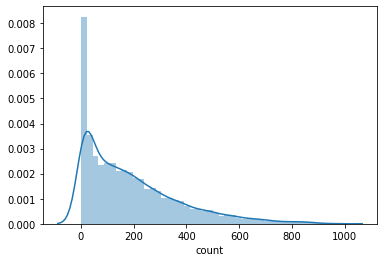

In [71]:
sns.distplot(yLabels)

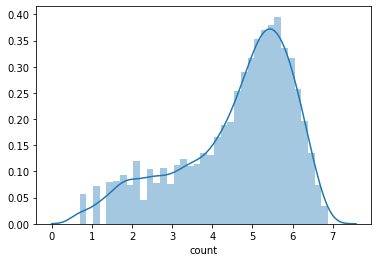

In [72]:
sns.distplot(np.log1p(yLabels))

In [73]:
"""
GridSearchCV를 활용하면 우리가 이용하게 될 각각의 모델마다 변경해야 하는 파라미터 튜닝시 어떤 파라미터가 최적의 값을 내는지 등을 알 수 있음.
## 아이 캔트 언더스탠드 디스
GridSearchCV 참조:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://datascienceschool.net/view-notebook/ff4b5d491cc34f94aea04baca86fbef8/
"""
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#Ridge모델은 L2제약을 가지는 선형회귀모델에서 개선된 모델이며 해당 모델에서 유의 깊게 튜닝해야하는 파라미터는 alpha값이다.
ridge = Ridge()

#우리가 튜닝하고자하는 Ridge의 파라미터 중 특정 파라미터에 배열 값으로 넘겨주게 되면 테스트 후 어떤 파라미터가 최적의 값인지 알려줌 
ridge_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
rmsle_scorer = metrics.make_scorer(rmsle,greater_is_better=False)
grid_ridge = GridSearchCV(ridge,ridge_params,scoring=rmsle_scorer,cv=5)

grid_ridge.fit(train,yLabelslog)
preds = grid_ridge.predict(train)
print(grid_ridge.best_params_)
print('RMSLE Value for Ridge Regression {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

{'alpha': 0.001, 'max_iter': 3000}
RMSLE Value for Ridge Regression 0.9770930364235721


In [74]:
print(grid_ridge.best_params_)

{'alpha': 0.001, 'max_iter': 3000}


In [75]:
#결과에 대해 GridSearchCV의 변수인 grid_ridge변수에 cv_result_를 통해 alpha값의 변화에 따라 평균값의 변화를 파악 가능
##???
df = pd.DataFrame(grid_ridge.cv_results_)

In [76]:
#Ridge모델은 L1제약을 가지는 선형회귀모델에서 개선된 모델이며 해당 모델에서 유의 깊게 튜닝해야하는 파라미터는 alpha값이다.
##???
lasso = Lasso()

lasso_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
grid_lasso = GridSearchCV(lasso,lasso_params,scoring=rmsle_scorer,cv=5)
grid_lasso.fit(train,yLabelslog)
preds = grid_lasso.predict(train)
print('RMSLE Value for Lasso Regression {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value for Lasso Regression 0.9771069491458308


In [77]:
##???
rf = RandomForestRegressor()

rf_params = {'n_estimators':[1,10,100]}
grid_rf = GridSearchCV(rf,rf_params,scoring=rmsle_scorer,cv=5)
grid_rf.fit(train,yLabelslog)
preds = grid_rf.predict(train)
print('RMSLE Value for RandomForest {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value for RandomForest 0.10295139149091177


In [78]:
##???
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_params={'max_depth':range(1,11,1),'n_estimators':[1,10,100]}
grid_gb=GridSearchCV(gb,gb_params,scoring=rmsle_scorer,cv=5)
grid_gb.fit(train,yLabelslog)
preds = grid_gb.predict(train)
print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value for GradientBoosting 0.20790385190358443


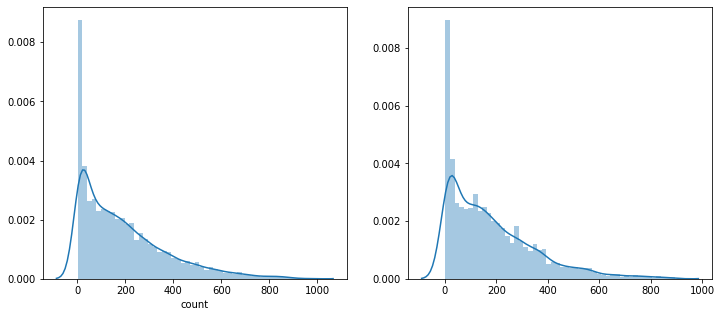

In [79]:
predsTest = grid_rf.predict(test)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(yLabels,ax=ax1,bins=50)
sns.distplot(np.exp(predsTest),ax=ax2,bins=50)

In [80]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(predsTest)]
    })
submission.to_csv('BBB.csv', index=False)